In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)
df = pd.read_csv('estaticos_market.csv', index_col=0)

In [3]:
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,Fals

In [4]:
removed_columns = []
null_count = df.isna().sum()
percent = null_count/df.shape[0]
for col in df.iloc[:, 1:]:
    if df[col].isna().sum()/df[col].shape[0] > 0.6:
        removed_columns.append(col)

In [5]:
new_columns = list(set(df.columns) - set(removed_columns))
df = df.loc[:, new_columns]
df.head()

,idade_emp_cat,de_nivel_atividade,de_faixa_faturamento_estimado_grupo,fl_ltda,nu_meses_rescencia,setor,idade_media_socios,nm_micro_regiao,de_natureza_juridica,de_faixa_faturamento_estimado,idade_empresa_anos,fl_passivel_iss,fl_mei,qt_filiais,id,qt_socios,fl_rm,qt_socios_masculino,de_ramo,fl_epp,dt_situacao,qt_socios_pf,fl_telefone,idade_maxima_socios,fl_antt,de_saude_rescencia,sg_uf,de_saude_tributaria,vl_faturamento_estimado_grupo_aux,fl_optante_simei,nm_meso_regiao,qt_socios_pj,fl_matriz,nm_segmento,fl_sa,fl_email,fl_optante_simples,idade_minima_socios,fl_simples_irregular,vl_faturamento_estimado_aux,vl_total_veiculos_leves_grupo,fl_st_especial,empsetorcensitariofaixarendapopulacao,nm_divisao,qt_socios_st_regular,fl_me,sg_uf_matriz,vl_total_veiculos_pesados_grupo,fl_spa,fl_veiculo,natureza_juridica_macro
0,10 a 15,ALTA,"DE R$ 1.500.000,01 A R$ 4.800.000,00",False,23.0,CONSTRUÇÃO CIVIL,44.0,NATAL,SOCIEDADE EMPRESARIA LIMITADA,"DE R$ 1.500.000,01 A R$ 4.800.000,00",14.457534,True,False,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,2.0,SIM,2.0,INDUSTRIA DA CONSTRUCAO,False,2005-03-25,2.0,True,47.0,False,ACIMA DE 1 ANO,RN,VERDE,3132172.8,False,LESTE POTIGUAR,0.0,True,CONSTRUCAO,False,True,True,41.0,False,3132172.8,0.0,False,NaN,CONSTRUCAO DE EDIFICIOS,2.0,False,RN,0.0,False,False,ENTIDADES EMPRESARIAIS
1,1 a 5,BAIXA,"DE R$ 81.000,01 A R$ 360.000,00",False,9.0,SERVIÇO,27.0,TERESINA,EMPRESARIO INDIVIDUAL,"DE R$ 81.000,01 A R$ 360.000,00",1.463014,True,True,0,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1.0,SIM,1.0,SERVICOS DE ALOJAMENTO/ALIMENTACAO,False,2017-05-12,1.0,True,27.0,False,ATE 1 ANO,PI,CINZA,210000.0,NaN,CENTRO NORTE PIAUIENSE,0.0,True,ALOJAMENTO E ALIMENTACAO,False,True,NaN,27.0,False,210000.0,0.0,False,468.93,ALIMENTACAO,1.0,False,PI,0.0,False,False,OUTROS
2,5 a 10,MEDIA,"ATE R$ 81.000,00",False,26.0,SERVIÇO,32.0,MANAUS,EMPRESARIO INDIVIDUAL,"ATE R$ 81.000,00",7.093151,True,True,0,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1.0,SIM,1.0,"TRANSPORTE, ARMAZENAGEM E CORREIO",False,2011-09-26,1.0,True,32.0,False,ACIMA DE 1 ANO,AM,AMARELO,50000.0,True,CENTRO AMAZONENSE,0.0,True,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,True,32.0,False,50000.0,0.0,False,713.50,TRANSPORTE TERRESTRE,NaN,False,AM,0.0,False,False,OUTROS
3,5 a 10,MEDIA,"DE R$ 81.000,01 A R$ 360.000,00",False,26.0,SERVIÇO,36.0,MANAUS,EMPRESARIO INDIVIDUAL,"DE R$ 81.000,01 A R$ 360.000,00",6.512329,True,False,0,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1.0,SIM,1.0,SERVICOS DIVERSOS,False,2012-04-25,1.0,True,36.0,False,ACIMA DE 1 ANO,AM,AMARELO,210000.0,False,CENTRO AMAZONENSE,0.0,True,OUTRAS ATIVIDADES DE SERVICOS,False,True,True,36.0,False,210000.0,0.0,False,475.73,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,1.0,False,AM,0.0,False,False,OUTROS
4,1 a 5,ALTA,"DE R$ 81.000,01 A R$ 360.000,00",False,27.0,SERVIÇO,NaN,NATAL,EMPRESARIO INDIVIDUAL,"DE R$ 81.000,01 A R$ 360.000,00",3.200000,True,False,0,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1.0,SIM,NaN,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",False,2015-08-17,1.0,True,NaN,False,ACIMA DE 1 ANO,RN,VERDE,210000.0,False,LESTE POTIGUAR,0.0,True,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,True,True,NaN,False,210000.0,0.0,False,2874.04,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,NaN,False,RN,0.0,False,False,OUTROS


In [6]:
df_id = df['id']
df_dummy = df.drop('id',axis=1)

In [7]:
# Fix True/False objects
df_dummy['fl_passivel_iss'] = df_dummy['fl_passivel_iss'].astype('bool')
df_dummy['fl_antt'] = df_dummy['fl_antt'].astype('bool')
df_dummy['fl_spa'] = df_dummy['fl_spa'].astype('bool')
df_dummy['fl_simples_irregular'] = df_dummy['fl_simples_irregular'].astype('bool')
df_dummy['fl_veiculo'] = df_dummy['fl_veiculo'].astype('bool')

In [9]:
df_dummy.shape

(462298, 50)

In [27]:
df_dummy.isna().sum()

idade_emp_cat                                 0
de_nivel_atividade                        11168
de_faixa_faturamento_estimado_grupo       27513
fl_ltda                                       0
nu_meses_rescencia                        45276
setor                                      1927
idade_media_socios                       151602
nm_micro_regiao                           58698
de_natureza_juridica                          0
de_faixa_faturamento_estimado             27513
idade_empresa_anos                            0
fl_passivel_iss                               0
fl_mei                                        0
qt_filiais                                    0
qt_socios                                115091
fl_rm                                         0
qt_socios_masculino                      267183
de_ramo                                       0
fl_epp                                        0
dt_situacao                                   6
qt_socios_pf                            

In [141]:
df_dummy['empsetorcensitariofaixarendapopulacao'] = df_dummy['empsetorcensitariofaixarendapopulacao'].fillna(
    df_dummy['empsetorcensitariofaixarendapopulacao'].mean()) # oreenchendo com a media
df_dummy['sg_uf_matriz'] = df_dummy['sg_uf_matriz'].fillna('outro')
df_dummy['qt_socios_st_regular'] = df_dummy['qt_socios_st_regular'].fillna(
    df['qt_socios_st_regular'].mean()) 
df_dummy['empsetorcensitariofaixarendapopulacao'] = df_dummy['empsetorcensitariofaixarendapopulacao'].fillna(
    df_dummy['empsetorcensitariofaixarendapopulacao'].median())
df_dummy['nm_divisao'] = df_dummy['nm_divisao'].fillna('COMERCIO VAREJISTA')
df_dummy['vl_total_veiculos_leves_grupo'] = df_dummy['vl_total_veiculos_leves_grupo'].fillna(0)
df_dummy['vl_faturamento_estimado_aux'] = df_dummy['vl_faturamento_estimado_aux'].fillna(
    df_dummy['vl_faturamento_estimado_aux'].median())
df_dummy['idade_minima_socios'] = df_dummy['idade_minima_socios'].fillna(
    df_dummy['idade_minima_socios'].mean())
df_dummy['fl_optante_simples'] = df_dummy['fl_optante_simples'].fillna(True) # possui 20mil leituras a mais, o que pode ser uma fonte de erro
df_dummy['nm_segmento'] = df_dummy['nm_segmento'].fillna('OUTRAS ATIVIDADES DE SERVICOS')
df_dummy['qt_socios_pj'] = df_dummy['qt_socios_pj'].fillna(0) 
df_dummy['nm_meso_regiao'] = df_dummy['nm_meso_regiao'].fillna('OUTRO') 
df_dummy['fl_optante_simei'] = df_dummy['fl_optante_simei'].fillna(True) # maioria
df_dummy['vl_faturamento_estimado_grupo_aux'] = df_dummy['vl_faturamento_estimado_grupo_aux'].fillna(
    df_dummy['vl_faturamento_estimado_grupo_aux'].mean()) # distribuição com muita assimetria
df_dummy['de_saude_tributaria'] = df_dummy['de_saude_tributaria'].fillna('VERDE') # assume-se que, ao nao preencher, esta no verde
df_dummy['de_saude_rescencia'] = df_dummy['de_saude_rescencia'].fillna('ACIMA DE 1 ANO')
df_dummy['idade_maxima_socios'] = df_dummy['idade_maxima_socios'].fillna(df_dummy['idade_maxima_socios'].mean())
df_dummy['vl_total_veiculos_pesados_grupo'] = df_dummy['vl_total_veiculos_pesados_grupo'].fillna(0) 
df_dummy['qt_socios_pf'] = df_dummy['qt_socios_pf'].fillna(df_dummy['qt_socios_pf'].median())
df_dummy['qt_socios_masculino'] = df_dummy['qt_socios_masculino'].fillna(
    df_dummy['qt_socios_masculino'].median()) # talvez preencher com 0 seja melhor
df_dummy['qt_socios'] = df_dummy['qt_socios'].fillna(
    df_dummy['qt_socios'].median())
df_dummy['de_faixa_faturamento_estimado'] = df_dummy['de_faixa_faturamento_estimado'].fillna(
    'DE R$ 81.000,01 A R$ 360.000,00')
df_dummy['nm_micro_regiao'] = df_dummy['nm_micro_regiao'].fillna('NAO ESPECIFICADO')
df_dummy['idade_media_socios'] = df_dummy['idade_media_socios'].fillna(df_dummy['idade_media_socios'].median())
df_dummy['setor'] = df_dummy['setor'].fillna('COMERCIO')
df_dummy['nu_meses_rescencia'] = df_dummy['nu_meses_rescencia'].fillna(df_dummy['nu_meses_rescencia'].mean())
df_dummy['de_faixa_faturamento_estimado_grupo'] = df_dummy['de_faixa_faturamento_estimado_grupo'].fillna(
    'DE R$ 81.000,01 A R$ 360.000,00')
df_dummy['de_nivel_atividade'] = df_dummy['de_nivel_atividade'].fillna('MEDIA')
df_dummy['dt_situacao'] = df_dummy['dt_situacao'].fillna('2005-11-03')

In [143]:
df_dummy.isna().any().sum()

0

In [161]:
pd.DataFrame([df_dummy.nunique(),df_dummy.dtypes])

,idade_emp_cat,de_nivel_atividade,de_faixa_faturamento_estimado_grupo,fl_ltda,nu_meses_rescencia,setor,idade_media_socios,nm_micro_regiao,de_natureza_juridica,de_faixa_faturamento_estimado,idade_empresa_anos,fl_passivel_iss,fl_mei,qt_filiais,qt_socios,fl_rm,qt_socios_masculino,de_ramo,fl_epp,dt_situacao,qt_socios_pf,fl_telefone,idade_maxima_socios,fl_antt,de_saude_rescencia,sg_uf,de_saude_tributaria,vl_faturamento_estimado_grupo_aux,fl_optante_simei,nm_meso_regiao,qt_socios_pj,fl_matriz,nm_segmento,fl_sa,fl_email,fl_optante_simples,idade_minima_socios,fl_simples_irregular,vl_faturamento_estimado_aux,vl_total_veiculos_leves_grupo,fl_st_especial,empsetorcensitariofaixarendapopulacao,nm_divisao,qt_socios_st_regular,fl_me,sg_uf_matriz,vl_total_veiculos_pesados_grupo,fl_spa,fl_veiculo,natureza_juridica_macro
0,6,4,11,2,52,5,1010,74,67,12,14198,2,2,304,62,2,41,33,1,7334,64,2,119,2,5,6,6,6795,2,20,12,2,21,2,2,2,115,2,1920,310,2,15420,87,55,2,28,296,2,2,7
1,object,object,object,bool,float64,object,float64,object,object,object,float64,bool,bool,int64,float64,object,float64,object,bool,object,float64,bool,float64,bool,object,object,object,float64,bool,object,float64,bool,object,bool,bool,bool,float64,bool,float64,float64,bool,float64,object,float64,bool,object,float64,bool,bool,object


In [185]:
df_new = pd.get_dummies(df_dummy.drop(['nm_micro_regiao','dt_situacao','de_natureza_juridica',
                                       'de_ramo','nm_meso_regiao','nm_divisao'],
                                      axis=1),sparse=True,drop_first=True)

In [186]:
df_new.shape

(462298, 133)

In [181]:
X = pd.concat([df_id,df_new], axis='columns')

In [182]:
X.head()

,id,fl_ltda,nu_meses_rescencia,idade_media_socios,idade_empresa_anos,fl_passivel_iss,fl_mei,qt_filiais,qt_socios,qt_socios_masculino,fl_epp,qt_socios_pf,fl_telefone,idade_maxima_socios,fl_antt,vl_faturamento_estimado_grupo_aux,fl_optante_simei,qt_socios_pj,fl_matriz,fl_sa,fl_email,fl_optante_simples,idade_minima_socios,fl_simples_irregular,vl_faturamento_estimado_aux,vl_total_veiculos_leves_grupo,fl_st_especial,empsetorcensitariofaixarendapopulacao,qt_socios_st_regular,fl_me,vl_total_veiculos_pesados_grupo,fl_spa,fl_veiculo,idade_emp_cat_10 a 15,idade_emp_cat_15 a 20,idade_emp_cat_5 a 10,idade_emp_cat_<= 1,idade_emp_cat_> 20,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,"de_faixa_faturamento_estimado_grupo_ATE R$ 81.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00",setor_COMERCIO,setor_CONSTRUÇÃO CIVIL,setor_INDUSTRIA,setor_SERVIÇO,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_NATUREZA JURIDICA INVALIDA,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,.

In [178]:
from sklearn.cluster import KMeans

In [179]:
def kmeans(numero_de_clusters, variaveis):
    model = KMeans(n_clusters = numero_de_clusters)
    model.fit(variaveis)
    return [numero_de_clusters, model.inertia_]

In [187]:
kmeans(5,df_new)

[5, 1.3241402044696604e+23]

In [188]:
cluster_plot = []
for i in range(5,15):
    cluster_plot.append(kmeans(i, df_new))

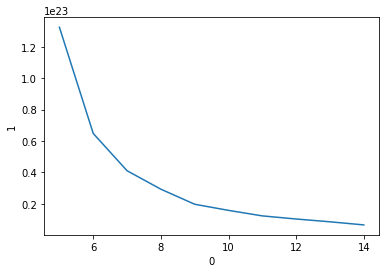

In [213]:
sns.lineplot(x=pd.DataFrame(cluster_plot)[0],y=pd.DataFrame(cluster_plot)[1])

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler = StandardScaler()

In [198]:
df_escalado = scaler.fit_transform(df_new)

In [204]:
cluster_plot_escalado = []
for i in range(5,20):
    cluster_plot_escalado.append(kmeans(i, df_escalado))

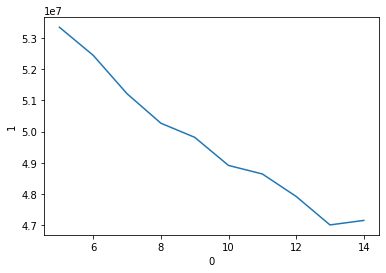

In [212]:
sns.lineplot(x=pd.DataFrame(cluster_plot_escalado)[0],y=pd.DataFrame(cluster_plot_escalado)[1])

In [214]:
kmeans(20,df_escalado)

[20, 43775098.932429306]

## Ordinal Encoding

In [215]:
from category_encoders.ordinal import OrdinalEncoder

In [216]:
df_ord = df_dummy.drop(['nm_micro_regiao','dt_situacao','de_natureza_juridica',
                                       'de_ramo','nm_meso_regiao','nm_divisao'],
                                      axis=1)

In [219]:
cols_to_ord = []
for col in df_ord:
    if df_ord[col].dtypes == np.object:
        cols_to_ord.append(col)

In [220]:
enc = OrdinalEncoder(cols=cols_to_ord)

In [221]:
df_ord = enc.fit_transform(df_ord)

In [222]:
df_ord_escalado = scaler.fit_transform(df_ord)

In [228]:
start = time.time()
cluster_ord_escalado = []
for i in range(5,40):
    cluster_ord_escalado.append(kmeans(i, df_ord_escalado))
end = time.time()
print(end - start)

3557.159184217453


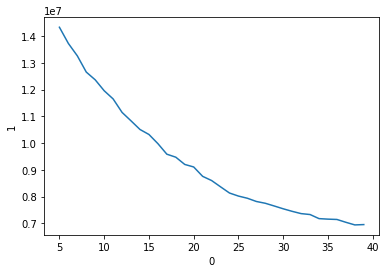

In [229]:
sns.lineplot(x=pd.DataFrame(cluster_ord_escalado)[0],y=pd.DataFrame(cluster_ord_escalado)[1])

In [225]:
import time

0.10547018051147461
